# This is a the Test Simulation for MWM Dust Targets

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table,vstack
from targetlib import testfield_gal,testfield_fk5,testfield_ecl
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic,FK5,BarycentricTrueEcliptic
import astropy.units as u
%matplotlib inline

## Read in Target and Cadence Tables

In [2]:
ver = 'beta-0'
dust_tab = Table.read('workspace/target_files/GG/{}/dust_galactic_1x1.csv'.format(ver))
dust_tab

ra,dec
float64,float64
188.179135,-87.43965899999999
264.941676,-86.768585
89.087716,-86.290337
196.29281699999999,-85.369659
327.00944300000003,-84.97357199999999
169.097522,-84.93541
169.81896899999998,-84.333412
189.627587,-83.41959399999999
276.85873,-83.32958199999999


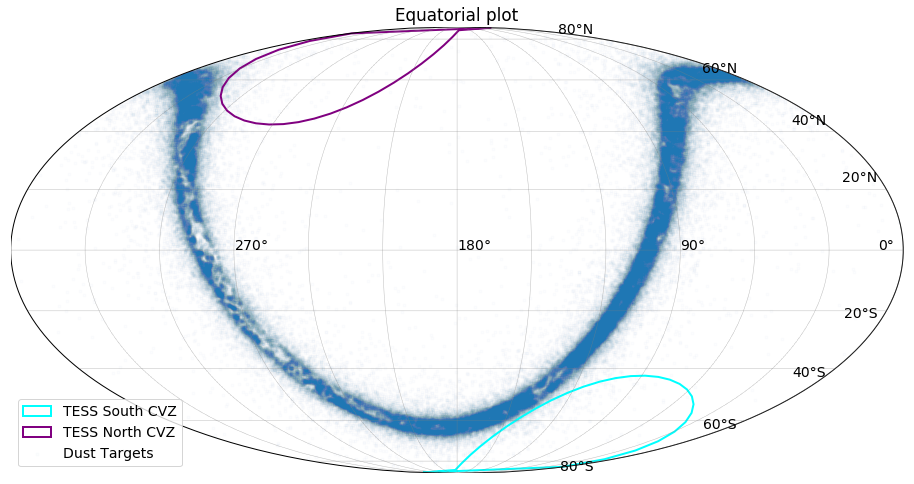

In [3]:
plt.rcParams.update({'font.size': 14})
(fig,bmap) = testfield_fk5()
#Plot Dust Targets
dustx,dusty = bmap(dust_tab['ra'],dust_tab['dec'])
bmap.scatter(dustx,dusty,marker='.',label='Dust Targets',alpha=0.01)
plt.title("Equatorial plot")
plt.legend()
plt.show()

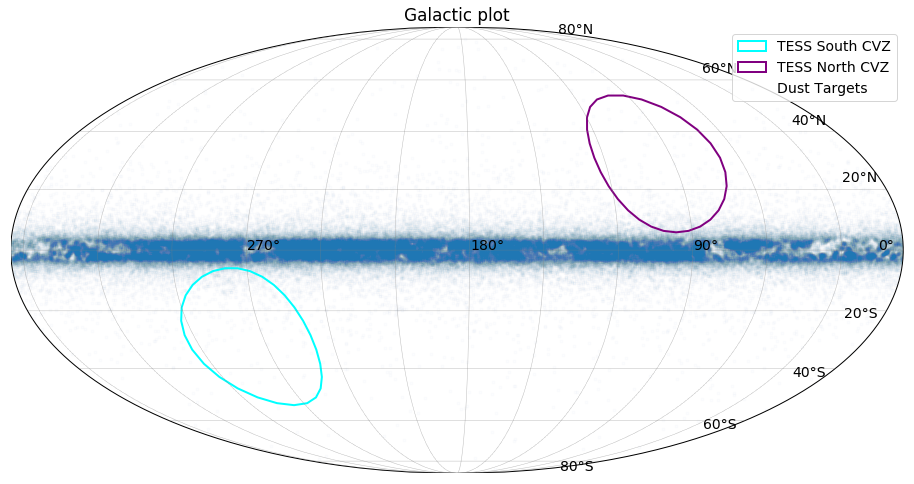

In [4]:
plt.rcParams.update({'font.size': 14})
(fig,bmap) = testfield_gal()
dust_coord_fk5 = SkyCoord(dust_tab['ra'],dust_tab['dec'],unit=(u.deg,u.deg),frame="fk5")
dust_coord_gal = dust_coord_fk5.transform_to(Galactic())
dustx,dusty = bmap(dust_coord_gal.l,dust_coord_gal.b)
bmap.scatter(dustx,dusty,marker='.',label='Dust Targets',alpha=0.01)
plt.title("Galactic plot")
plt.legend()
plt.show()

## Creating Target Table

In [5]:
target_tab = Table()

In [6]:
#Combine GG and Dust targets
target_tab['ra'] = dust_tab['ra']
target_tab['dec'] = dust_tab['dec']
target_tab['cadence'] = np.repeat('mwm_dust_1x1',len(dust_tab))
target_tab['type'] = np.repeat('mwm_dust',len(dust_tab))
target_tab['priority'] = np.repeat(np.array(79,dtype='int32'),len(dust_tab))
target_tab['value'] = np.repeat(np.array(1.0,dtype='float32'),len(dust_tab))

In [7]:
target_tab

ra,dec,cadence,type,priority,value
float64,float64,str12,str8,int32,float32
188.179135,-87.43965899999999,mwm_dust_1x1,mwm_dust,79,1.0
264.941676,-86.768585,mwm_dust_1x1,mwm_dust,79,1.0
89.087716,-86.290337,mwm_dust_1x1,mwm_dust,79,1.0
196.29281699999999,-85.369659,mwm_dust_1x1,mwm_dust,79,1.0
327.00944300000003,-84.97357199999999,mwm_dust_1x1,mwm_dust,79,1.0
169.097522,-84.93541,mwm_dust_1x1,mwm_dust,79,1.0
169.81896899999998,-84.333412,mwm_dust_1x1,mwm_dust,79,1.0
189.627587,-83.41959399999999,mwm_dust_1x1,mwm_dust,79,1.0
276.85873,-83.32958199999999,mwm_dust_1x1,mwm_dust,79,1.0


In [8]:
target_tab.write('{}/mwm_dust_target_{}.fits'.format(ver,ver),overwrite=True)

## Update Cadence Table

In [9]:
cadence_tab = Table()

In [10]:
cadence_tab['cadence'] = ['mwm_dust_1x1']
cadence_tab['nepochs'] = np.array(1,dtype='int32')
cadence_tab['delta'] = np.array([[0.0]],dtype='float32')
cadence_tab['delta_min'] = np.array([[0.0]],dtype='float32')
cadence_tab['delta_max'] = np.array([[0.0]],dtype='float32')
cadence_tab['lunation'] = np.array([[1.0]],dtype='float32')
cadence_tab['instrument'] = np.array([['apogee']],dtype='str')

In [11]:
cadence_tab

cadence,nepochs,delta [1],delta_min [1],delta_max [1],lunation [1],instrument [1]
str12,int32,float32,float32,float32,float32,str6
mwm_dust_1x1,1,0.0,0.0,0.0,1.0,apogee


In [12]:
cadence_tab.write('{}/mwm_dust_cadence_{}.fits'.format(ver,ver),overwrite=True)

In [13]:
test =  Table.read('{}/mwm_dust_cadence_{}.fits'.format(ver,ver))
test

cadence,nepochs,delta,delta_min,delta_max,lunation,instrument [1]
bytes12,int32,float32,float32,float32,float32,bytes24
mwm_dust_1x1,1,0.0,0.0,0.0,1.0,apogee
